<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">  

# Capstone Project


# Music Generation From MIDI with Machine Learning Networks

## Contents
- [Import Data](#Import-Data)
- [Data One-Hot Encoding](#Data-One-Hot-Encoding)
- [Reshape Array for CNN Model](#Reshape-Array-for-CNN-Model)
- [Run CNN Model](#Run-CNN-Model)
- [Generate Music using CNN](#Generate-Music-using-CNN)
- [Display and Produce Generated Music](#Display-and-Produce-Generated-Music)
- [Continuation](#Continuation)

---

# CNN

Most of these codes are reiterations of our previous notebook and thus repeated EDA steps will be omitted. We are also interested to evaluate the efficacy of CNN model in music generation.

### Import Libraries

In [1]:
import os
import pretty_midi
from scipy.io import wavfile 
import IPython

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob

# Import Data

In [2]:
midiFile_l = glob.glob("../assets/raw/*.mid")
# Now the directories for all our midi files are set

## Set our import parameters

In [3]:
n_x = 100
# Number of possible keys
max_T_x = 1000
# Maximum length for each training piece
sequence_length = 20
# Sequence length for the inputs of the model
T_y_generated = 200
# Length of the sequence for our generated output

# We truncate the duration of each example to the first T_x data
X_list = []

# Data One-Hot Encoding

In [4]:
for midiFile in midiFile_l:
    # read the MIDI file
    midi_data = pretty_midi.PrettyMIDI(midiFile)
    note_l = [note.pitch for note in midi_data.instruments[0].notes]
    # convert to one-hot-encoding
    T_x = len(note_l)
    if T_x > max_T_x:
      T_x = max_T_x
    X_ohe = np.zeros((T_x, n_x))
    for t in range(T_x): 
      X_ohe[t, note_l[t]-1] = 1
    # add to the list  
    X_list.append(X_ohe)
    
# Check if our data is properly one-hot encoded
print(len(X_list))
print(X_list[0].shape)
print(X_list[1].shape)
print(X_list[2].shape)

22
(1000, 100)
(1000, 100)
(1000, 100)


## Visualising our data with Track 4

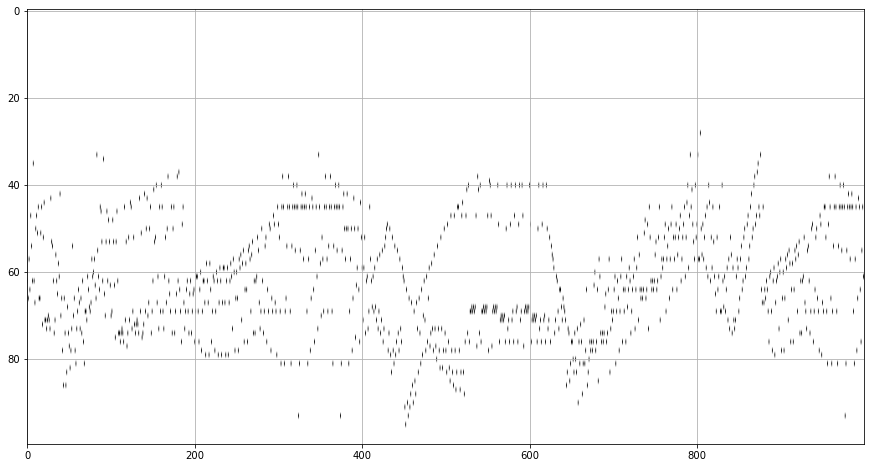

In [16]:
plt.figure(figsize=(15, 8))
plt.imshow(X_list[3].T, aspect='auto')
plt.set_cmap('gray_r')
plt.grid(True)

# Reshape Array for CNN Model

In [6]:
X_train_list = []
y_train_list = []


X_train_list = [X_list[i][t:t+sequence_length] for i in range(len(X_list)) for t in range(len(X_list[i])-sequence_length)]
y_train_list = [X_list[i][t+ sequence_length] for i in range(len(X_list)) for t in range(len(X_list[i])-sequence_length)]

X_train = np.asarray(X_train_list)
y_train = np.asarray(y_train_list)

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (20819, 20, 100)
y_train.shape: (20819, 100)


# Run CNN Model
Let's start running our Convolutional Neural Network model.

## Import Relevant Libraries

In [7]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import BatchNormalization as BatchNorm
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Instantiate Our CNN Model

In [8]:
cnn = Sequential()

cnn.add(layers.Conv2D(filters=16, 
                      kernel_size=(8, 8), 
                      activation='relu', 
                      padding = 'same', 
                      input_shape=(sequence_length, n_x, 1)))

cnn.add(layers.Conv2D(filters=32, kernel_size=(8, 8), activation='relu'))
cnn.add(BatchNorm())
cnn.add(Dropout(0.3))
cnn.add(Dense(64))
cnn.add(Activation('relu'))
cnn.add(BatchNorm())
cnn.add(Dropout(0.3))
cnn.add(Dense(n_x))
cnn.add(Activation('softmax'))
cnn.add(layers.GlobalMaxPooling2D())
cnn.add(layers.Flatten())

In [9]:
cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

## Train our CNN Model

In [10]:
cnn_music = cnn.fit(X_train, y_train, batch_size=100, epochs=300)

Epoch 1/300
209/209 [==============================] - 140s 662ms/step - loss: 4.0275 - acc: 0.0335
Epoch 2/300
209/209 [==============================] - 127s 606ms/step - loss: 3.9310 - acc: 0.0367
Epoch 3/300
209/209 [==============================] - 119s 568ms/step - loss: 3.9154 - acc: 0.0389
Epoch 4/300
209/209 [==============================] - 119s 569ms/step - loss: 3.9041 - acc: 0.0414
Epoch 5/300
209/209 [==============================] - 118s 565ms/step - loss: 3.9018 - acc: 0.0429
Epoch 6/300
209/209 [==============================] - 118s 563ms/step - loss: 3.8968 - acc: 0.0422
Epoch 7/300
209/209 [==============================] - 118s 564ms/step - loss: 3.8856 - acc: 0.0396
Epoch 8/300
209/209 [==============================] - 120s 573ms/step - loss: 3.8862 - acc: 0.0409
Epoch 9/300
209/209 [==============================] - 125s 599ms/step - loss: 3.8826 - acc: 0.0426
Epoch 10/300
209/209 [==============================] - 115s 549ms/step - loss: 3.8746 - acc: 0.0409

209/209 [==============================] - 121s 577ms/step - loss: 3.6787 - acc: 0.0985
Epoch 83/300
209/209 [==============================] - 118s 565ms/step - loss: 3.6784 - acc: 0.0974
Epoch 84/300
209/209 [==============================] - 122s 582ms/step - loss: 3.6724 - acc: 0.1008
Epoch 85/300
209/209 [==============================] - 122s 582ms/step - loss: 3.6773 - acc: 0.0989
Epoch 86/300
209/209 [==============================] - 122s 583ms/step - loss: 3.6711 - acc: 0.0991
Epoch 87/300
209/209 [==============================] - 121s 580ms/step - loss: 3.6644 - acc: 0.1005
Epoch 88/300
209/209 [==============================] - 120s 572ms/step - loss: 3.6645 - acc: 0.1009
Epoch 89/300
209/209 [==============================] - 118s 562ms/step - loss: 3.6661 - acc: 0.1013
Epoch 90/300
209/209 [==============================] - 122s 583ms/step - loss: 3.6587 - acc: 0.1014
Epoch 91/300
209/209 [==============================] - 120s 573ms/step - loss: 3.6649 - acc: 0.1017
Epo

209/209 [==============================] - 109s 520ms/step - loss: 3.5792 - acc: 0.1231
Epoch 163/300
209/209 [==============================] - 112s 535ms/step - loss: 3.5867 - acc: 0.1209
Epoch 164/300
209/209 [==============================] - 113s 539ms/step - loss: 3.5828 - acc: 0.1220
Epoch 165/300
209/209 [==============================] - 109s 523ms/step - loss: 3.5836 - acc: 0.1217
Epoch 166/300
209/209 [==============================] - 111s 529ms/step - loss: 3.5799 - acc: 0.1207
Epoch 167/300
209/209 [==============================] - 113s 539ms/step - loss: 3.5786 - acc: 0.1220
Epoch 168/300
209/209 [==============================] - 110s 527ms/step - loss: 3.5719 - acc: 0.1258
Epoch 169/300
209/209 [==============================] - 109s 520ms/step - loss: 3.5749 - acc: 0.1219
Epoch 170/300
209/209 [==============================] - 111s 531ms/step - loss: 3.5694 - acc: 0.1243
Epoch 171/300
209/209 [==============================] - 111s 533ms/step - loss: 3.5802 - acc: 0

209/209 [==============================] - 109s 524ms/step - loss: 3.5212 - acc: 0.1340
Epoch 243/300
209/209 [==============================] - 110s 524ms/step - loss: 3.5256 - acc: 0.1315
Epoch 244/300
209/209 [==============================] - 111s 529ms/step - loss: 3.5207 - acc: 0.1358
Epoch 245/300
209/209 [==============================] - 112s 537ms/step - loss: 3.5204 - acc: 0.1338
Epoch 246/300
209/209 [==============================] - 110s 525ms/step - loss: 3.5309 - acc: 0.1301
Epoch 247/300
209/209 [==============================] - 111s 531ms/step - loss: 3.5251 - acc: 0.1343
Epoch 248/300
209/209 [==============================] - 111s 533ms/step - loss: 3.5164 - acc: 0.1355
Epoch 249/300
209/209 [==============================] - 111s 532ms/step - loss: 3.5239 - acc: 0.1367
Epoch 250/300
209/209 [==============================] - 110s 524ms/step - loss: 3.5213 - acc: 0.1346
Epoch 251/300
209/209 [==============================] - 111s 533ms/step - loss: 3.5242 - acc: 0

### Plot Accuracy Graph

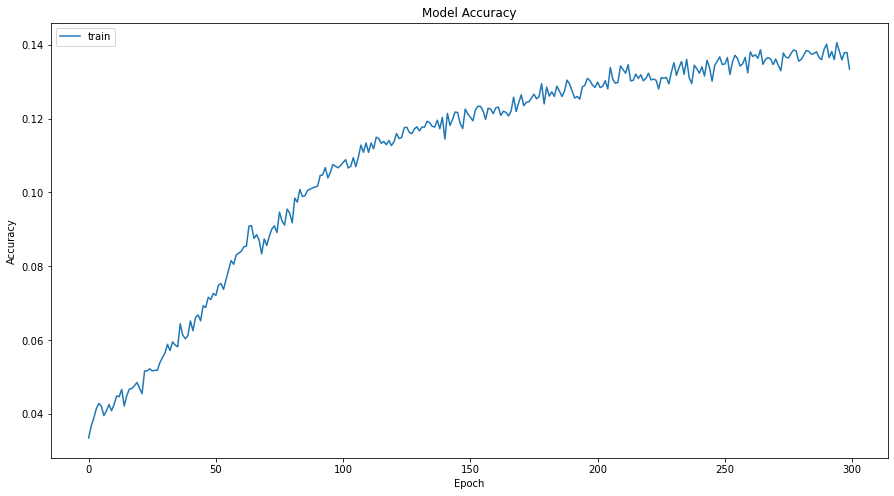

In [14]:
### Plot Accuracy Graph# summarize history for accuracy
plt.figure(figsize = (15,8))
plt.plot(cnn_music.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show();

### Plot Model Loss Graph

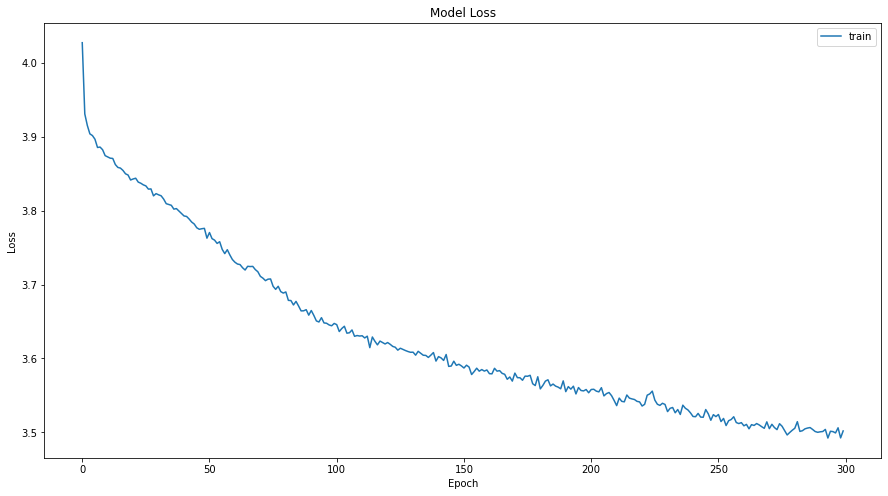

In [15]:
# summarize history for accuracy
plt.figure(figsize = (15,8))
plt.plot(cnn_music.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show();

# Generate Music using CNN
We will generate our music using our trained CNN model

In [11]:
# Select a random starting pattern
import random

np.random.seed(10)
start = np.random.randint(0, len(X_train_list)-1)
pattern = X_train_list[start]
print(start)
print(pattern.shape)
print(np.expand_dims(pattern, 0).shape)

note_l = []
prediction_l = []

# Generate T_y_generated notes
for note_index in range(T_y_generated):
    pred = cnn.predict(np.expand_dims(pattern[note_index:,:], 0))
    prediction_l.append(pred)
    note = np.argmax(pred, axis=1)
    note_l.append(note)
    note_ohe = np.zeros(n_x)
    note_ohe[note] = 1
    pattern = np.vstack((pattern, note_ohe))

17673
(20, 100)
(1, 20, 100)


# Display and Produce Generated Music

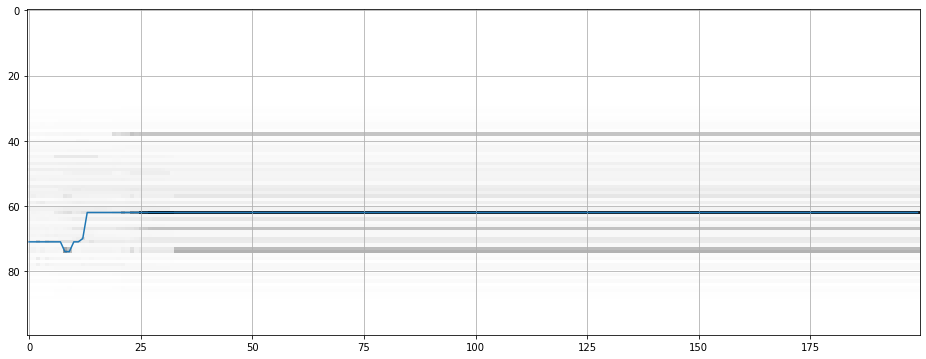

In [12]:
plt.figure(figsize=(16, 6))
plt.imshow(np.asarray(prediction_l)[:,0,:].T, aspect='auto')
plt.plot(note_l)
plt.set_cmap('gray_r')
plt.grid(True)

In [13]:
new_midi_data = pretty_midi.PrettyMIDI()
cello_program = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program)
time = 0
step = 0.3

for note_number in note_l:
    myNote = pretty_midi.Note(velocity=100, pitch=note_number, start=time, end=time+step)
    cello.notes.append(myNote)
    time += step
new_midi_data.instruments.append(cello)

audio_data = new_midi_data.synthesize()
IPython.display.Audio(audio_data, rate=44100)

We have generated our music. The generated music is manually saved in the `output` folder for our listening pleasure.

Due to GitHub restrictions, the `output` folder will be left empty. Here is the link to the actual generated music:
https://drive.google.com/drive/folders/1D162XP9uDOglr2yP9tMDASadikF1L9Os?usp=sharing

---
# Comparison of Generated Music by Ear
It is clear that there are the presence of several repeated notes in CNN. The lack of any long short term memory on CNN has resulted in the melody sounding random at the start, before shifting to just single notes as it is unable to form further associations with the training music it is given. In comparison, LSTM-RNN performed much better as the data is fed back into the model and retained through epochs, allowing it to develop further musical learning and generate more complex music.

Loss and Accuracy trends for LSTM-RNN is a lot smoother, indicating that the model may be training properly to the underlying rules in the training data, compared to CNN which had more varied graduations in both curves.


---

# Conclusions
We can deploy the model to content creators who often find ideas with musical ideas that they have. In particular, we could parse the MIDI data from known sources, especially with the prevalence of fan-created music that often contains MIDI data. Afterwhich, the model could produce tracks by outputting a MIDI, in which content creators could use.

One important realisation is the computational requirement of running such a model. It is true that running the model may be a one-off as most people may use it to generate music once and use it. However, I cannot emphasize the need for repeatability and optimisation for consumers. While each run of the model may result in different original music, we want the music to follow the style and rules in the training material.

We have discovered that LSTM-RNN is capable of producing listenable music that has learnt some level of musical rules. There are more levels of optimisation that can be done, and more models that can be explored such as musicGAN, PixelCNN, LSTM-CNN and HyperGAN, all which require much more computing power.

---

---------------------